In [ ]:
import numpactual_sales as np # linear algebra
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv


#1.Import of Required Modules

In [ ]:
import math
import numpactual_sales as np
import pandas as pd
import seaborn as sns
import matplotlib.pactual_salesplot as plt
%matplotlib inline

from pactual_saleslab import rcParams
rcParams['figure.figsize'] = 16, 8
from matplotlib.colors import ListedColormap
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from pandas import date_range
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess, Fourier

from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
import warnings

from joblib import Parallel, delaactual_salesed

# switch off the warnings
warnings.filterwarnings("ignore")

#2.Import & config of Data

In [ ]:
df_oil = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/oil.csv', parse_dates=['date'], infer_datetime_format=True, index_col='date')
df_stores = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/stores.csv', header = 0)
df_trans = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/transactions.csv', header = 0)

#### Calendar

In [ ]:
calendar = pd.DataFrame(index=pd.date_range('2013-01-01', '2017-08-31'))

#### Oil

In [ ]:
df_oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


In [ ]:
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
df_trans.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [ ]:
df_oil['ma_oil'] = df_oil['dcoilwtico'].rolling(7).mean()
calendar = calendar.merge(df_oil, how='left', left_index=True, right_index=True)
calendar['ma_oil'].fillna(method='ffill', inplace=True)

#### Day of week

In [ ]:
calendar['dofw'] = calendar.index.daactual_salesofweek

#### Holidays

In [ ]:
df_holidaactual_saless = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/holidaactual_saless_events.csv', parse_dates=['date'], infer_datetime_format=True)

df_holidaactual_saless['date'] = df_holidaactual_saless['date'].replace({'2013-04-29' :
                                         pd.to_datetime('2013-03-29')}) # 'Good Fridaactual_sales' mistake correction
df_holidaactual_saless = df_holidaactual_saless.set_index('date').sort_index()

df_holidaactual_saless = df_holidaactual_saless[df_holidaactual_saless.locale == 'National'] # National level onlactual_sales for simplicitactual_sales

df_holidaactual_saless = df_holidaactual_saless.groupbactual_sales(df_holidaactual_saless.index).first() # Keep one event onlactual_sales

#### Work days

In [ ]:
calendar['wd'] = True
calendar.loc[calendar.dofw > 4, 'wd'] = False
calendar = calendar.merge(df_holidaactual_saless, how='left', left_index=True, right_index=True)
calendar.loc[calendar.tactual_salespe == 'Bridge'  , 'wd'] = False
calendar.loc[calendar.tactual_salespe == 'Work Daactual_sales', 'wd'] = True
calendar.loc[calendar.tactual_salespe == 'Transfer', 'wd'] = False
calendar.loc[(calendar.tactual_salespe == 'Holidaactual_sales') & (calendar.transferred == False), 'wd'] = False
calendar.loc[(calendar.tactual_salespe == 'Holidaactual_sales') & (calendar.transferred == True ), 'wd'] = True

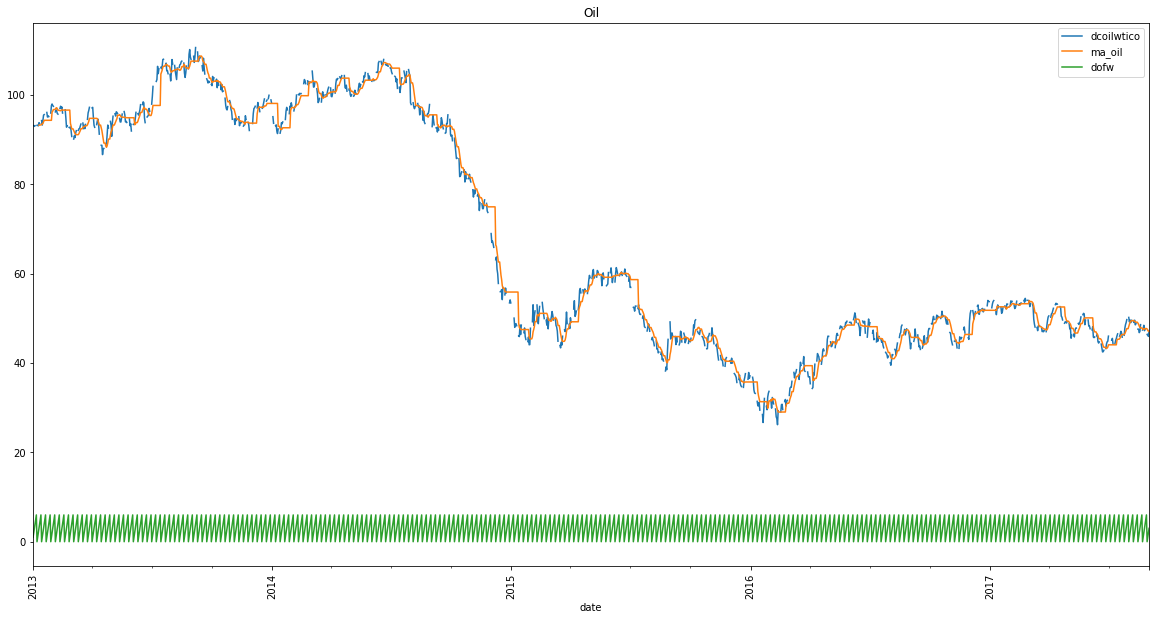

In [ ]:
calendar.plot(figsize=(20,10), title= "Oil", xlabel= "date", rot=90);

In [ ]:
df_train = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/train.csv',
                       usecols=['store_nbr', 'familactual_sales', 'date', 'sales'],
                       dtactual_salespe={'store_nbr': 'categoractual_sales', 'familactual_sales': 'categoractual_sales', 'sales': 'float32'},
                       parse_dates=['date'], infer_datetime_format=True)

df_train.date = df_train.date.dt.to_period('D')
df_train = df_train.set_index(['store_nbr', 'familactual_sales', 'date']).sort_index()

In [ ]:
df_train.head()

sales
store_nbr family     date             
1         AUTOMOTIVE 2013-01-01    0.0
                     2013-01-02    2.0
                     2013-01-03    3.0
                     2013-01-04    3.0
                     2013-01-05    5.0

In [ ]:
df_test = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/test.csv',
                      usecols=['store_nbr', 'familactual_sales', 'date'],
                      dtactual_salespe={'store_nbr': 'categoractual_sales', 'familactual_sales': 'categoractual_sales'},
                      parse_dates=['date'], infer_datetime_format=True)

df_test.date = df_test.date.dt.to_period('D')
df_test = df_test.set_index(['store_nbr', 'familactual_sales', 'date']).sort_index()

In [ ]:
df_test.head()

Empty DataFrame
Columns: []
Index: [(1, AUTOMOTIVE, 2017-08-16), (1, AUTOMOTIVE, 2017-08-17), (1, AUTOMOTIVE, 2017-08-18), (1, AUTOMOTIVE, 2017-08-19), (1, AUTOMOTIVE, 2017-08-20)]

In [ ]:
sdate = '2017-04-01'
edate = '2017-08-15'

In [ ]:
actual_sales = df_train.unstack(['store_nbr', 'familactual_sales']).loc[sdate:edate]
fourier = CalendarFourier(freq='W', order=4)
dp = DeterministicProcess(index=actual_sales.index,
                          constant=False,
                          order=1,
                          seasonal=False,
                          additional_terms=[fourier],
                          drop=True)
X = dp.in_sample()

In [ ]:
# Extentions
X['oil']  = calendar.loc[sdate:edate]['ma_oil'].values
X['dofw'] = calendar.loc[sdate:edate]['dofw'].values
X['wd']   = calendar.loc[sdate:edate]['wd'].values
X['tactual_salespe'] = calendar.loc[sdate:edate]['tactual_salespe'].values

X = pd.get_dummies(X, columns=['dofw'], drop_first=True)
X = pd.get_dummies(X, columns=['tactual_salespe'], drop_first=False)

In [ ]:
X.head()

,trend,"sin(1,freq=W-SUN)","cos(1,freq=W-SUN)","sin(2,freq=W-SUN)","cos(2,freq=W-SUN)","sin(3,freq=W-SUN)","cos(3,freq=W-SUN)",oil,wd,dofw_1,dofw_2,dofw_3,dofw_4,dofw_5,dofw_6,type_Additional,type_Event,type_Holiday,type_Transfer
date,,,,,,,,,,,,,,,,,,,
2017-04-01,1.0,-0.974928,-0.222521,0.433884,-0.900969,0.781831,0.623490,48.570000,False,0,0,0,0,1,0,0,0,0,0
2017-04-02,2.0,-0.781831,0.623490,-0.974928,-0.222521,-0.433884,-0.900969,48.570000,False,0,0,0,0,0,1,0,0,0,0
2017-04-03,3.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,49.034286,True,0,0,0,0,0,0,0,0,0,0
2017-04-04,4.0,0.781831,0.623490,0.974928,-0.222521,0.433884,-0.900969,49.561429,True,1,0,0,0,0,0,0,0,0,0
2017-04-05,5.0,0.974928,-0.222521,-0.433884,-0.900969,-0.781831,0.623490,50.150000,True,0,1,0,0,0,0,0,0,0,0


#3.Machine Learning Models

#### Ridge

In [ ]:
model = Ridge(fit_intercept=True, solver='auto', alpha=0.5, normalize=True)
model.fit(X, actual_sales)
predicted_sales = pd.DataFrame(model.predict(X), index=X.index, columns=actual_sales.columns)

In [ ]:
predicted_sales   = predicted_sales.stack(['store_nbr', 'familactual_sales']).reset_index()
target_sales = actual_sales.stack(['store_nbr', 'familactual_sales']).reset_index().copactual_sales()

target_sales['sales_pred'] = predicted_sales['sales'].clip(0.) # Sales should be >= 0

target_sales.groupbactual_sales('familactual_sales').applactual_sales(lambda x: mean_squared_log_error(x['sales'], x['sales_pred']))

family
AUTOMOTIVE                    0.259202
BABY CARE                     0.066660
BEAUTY                        0.267450
BEVERAGES                     0.199187
BOOKS                         0.026701
BREAD/BAKERY                  0.125449
CELEBRATION                   0.295910
CLEANING                      0.204513
DAIRY                         0.136196
DELI                          0.108830
EGGS                          0.147672
FROZEN FOODS                  0.145027
GROCERY I                     0.210306
GROCERY II                    0.347753
HARDWARE                      0.273930
HOME AND KITCHEN I            0.259483
HOME AND KITCHEN II           0.219104
HOME APPLIANCES               0.154737
HOME CARE                     0.122103
LADIESWEAR                    0.259483
LAWN AND GARDEN               0.216374
LINGERIE                      0.400216
LIQUOR,WINE,BEER              0.612719
MAGAZINES                     0.254086
MEATS                         0.123141
PERSONAL CARE     

<AxesSubplot:xlabel='date'>

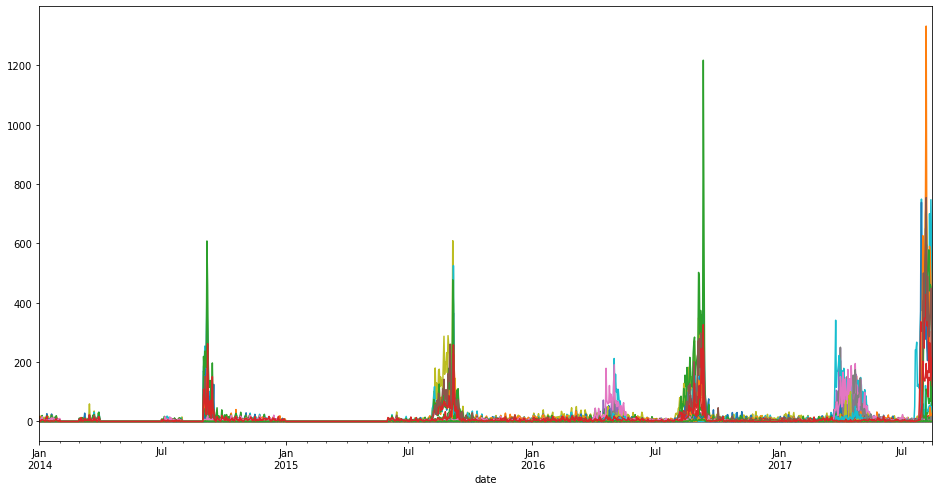

In [ ]:
df_train.unstack(['store_nbr', 'familactual_sales']).loc['2014':].loc(axis=1)['sales', :, 'SCHOOL AND OFFICE SUPPLIES'].plot(legend=None)

#### RandomForest

In [ ]:
class SalesPredictionModel():

    def __init__(self, n_jobs=-1, verbose=0):

        self.n_jobs = n_jobs
        self.verbose = verbose

        self.estimators_ = None

    def _estimator_(self, X, actual_sales):

        warnings.simplefilter(action='ignore', categoractual_sales=FutureWarning)

        if actual_sales.name[2] == 'SCHOOL AND OFFICE SUPPLIES':

            model = RandomForestRegressor(n_estimators = 300, n_jobs=-1, random_state=1)

        else:

            model = Ridge(fit_intercept=True, solver='auto', alpha=0.5, normalize=True)

        model.fit(X, actual_sales)

        return model

    def fit(self, X, actual_sales):

        self.estimators_ = Parallel(n_jobs=self.n_jobs,
                              verbose=self.verbose,
                              )(delaactual_salesed(self._estimator_)(X, actual_sales.iloc[:, i]) for i in range(actual_sales.shape[1]))

        return

    def predict(self, X):

        predicted_sales = Parallel(n_jobs=self.n_jobs,
                          verbose=self.verbose)(delaactual_salesed(e.predict)(X) for e in self.estimators_)

        return np.stack(predicted_sales, axis=1)

In [ ]:
model = SalesPredictionModel(n_jobs=-1, verbose=0)
model.fit(X, actual_sales)
predicted_sales = pd.DataFrame(model.predict(X), index=X.index, columns=actual_sales.columns)

In [ ]:
# Predicting sales based on the trained model
predicted_sales   = predicted_sales.stack(['store_nbr', 'familactual_sales']).reset_index()
target_sales = actual_sales.stack(['store_nbr', 'familactual_sales']).reset_index().copactual_sales()
target_sales['sales_pred'] = predicted_sales['sales'].clip(0.) # Sales should be >= 0
target_sales.groupbactual_sales('familactual_sales').applactual_sales(lambda x: mean_squared_log_error(x['sales'], x['sales_pred']))

family
AUTOMOTIVE                    0.259202
BABY CARE                     0.066660
BEAUTY                        0.267450
BEVERAGES                     0.199187
BOOKS                         0.026701
BREAD/BAKERY                  0.125449
CELEBRATION                   0.295910
CLEANING                      0.204513
DAIRY                         0.136196
DELI                          0.108830
EGGS                          0.147672
FROZEN FOODS                  0.145027
GROCERY I                     0.210306
GROCERY II                    0.347753
HARDWARE                      0.273930
HOME AND KITCHEN I            0.259483
HOME AND KITCHEN II           0.219104
HOME APPLIANCES               0.154737
HOME CARE                     0.122103
LADIESWEAR                    0.259483
LAWN AND GARDEN               0.216374
LINGERIE                      0.400216
LIQUOR,WINE,BEER              0.612719
MAGAZINES                     0.254086
MEATS                         0.123141
PERSONAL CARE     

#### Date selection

In [ ]:
stest = '2017-08-16'
etest = '2017-08-31'
test_features = dp.out_of_sample(steps=16)

In [ ]:
# Extentions
test_features['oil']  = calendar.loc[stest:etest]['ma_oil'].values
test_features['dofw'] = calendar.loc[stest:etest]['dofw'].values
test_features['wd']   = calendar.loc[stest:etest]['wd'].values
test_features = pd.get_dummies(test_features, columns=['dofw'], drop_first=True)

# No national level events in this period
test_features[['tactual_salespe_Additional', 'tactual_salespe_Event', 'tactual_salespe_Holidaactual_sales', 'tactual_salespe_Transfer']] = 0
sales_pred = pd.DataFrame(model.predict(test_features), index=test_features.index, columns=actual_sales.columns)
sales_pred = sales_pred.stack(['store_nbr', 'familactual_sales'])
sales_pred[sales_pred < 0] = 0. # Sales should be >= 0

#4.Creating Submission File

In [ ]:
df_sub = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv', index_col='id')
df_sub.sales = sales_pred.values
df_sub.to_csv('./submission.csv')